In [1]:
# 导入工具包
import pandas as pd

# 读取数据
features = pd.read_csv('data/temps_extended.csv')

# 独热编码
features = pd.get_dummies(features)

# 提取特征和标签
labels = features['actual']
features = features.drop('actual', axis = 1)

# 特征名字留着备用
feature_list = list(features.columns)

# 转换成所需格式
import numpy as np

features = np.array(features)
labels = np.array(labels)

# 数据集切分
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 0)
#%%
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# 工具包导入
import pandas as pd

# 为了剔除特征个数对结果的影响，这里特征统一只有老数据集中特征
original_feature_indices = [feature_list.index(feature) for feature in
                                      feature_list if feature not in
                                      ['ws_1', 'prcp_1', 'snwd_1']]

# 读取老数据集
original_features = pd.read_csv('data/temps.csv')

original_features = pd.get_dummies(original_features)

import numpy as np

# 数据和标签转换
original_labels = np.array(original_features['actual'])

original_features= original_features.drop('actual', axis = 1)

original_feature_list = list(original_features.columns)

original_features = np.array(original_features)

# 数据集切分
from sklearn.model_selection import train_test_split

original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, 
                                                                                                                test_size = 0.25, random_state = 42)

# 同样的树模型进行建模
from sklearn.ensemble import RandomForestRegressor

# 同样的参数与随机种子
rf = RandomForestRegressor(n_estimators= 100, random_state=0)

# 这里的训练集使用的是老数据集的
rf.fit(original_train_features, original_train_labels);

# 为了测试效果能够公平，统一使用一致的测试集，这里选择了刚刚我切分过的新数据集的测试集
predictions = rf.predict(test_features[:,original_feature_indices])

# 先计算温度平均误差
errors = abs(predictions - test_labels)

print('平均温度误差:', round(np.mean(errors), 2), 'degrees.')

# MAPE
mape = 100 * (errors / test_labels)

# 这里的Accuracy为了方便观察，我们就用100减去误差了，希望这个值能够越大越好
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn.ensemble import RandomForestRegressor

# 剔除掉新的特征，保证数据特征是一致的
original_train_features = train_features[:,original_feature_indices]

original_test_features = test_features[:, original_feature_indices]

rf = RandomForestRegressor(n_estimators= 100 ,random_state=0)

rf.fit(original_train_features, train_labels);

# 预测
baseline_predictions = rf.predict(original_test_features)

# 结果
baseline_errors = abs(baseline_predictions - test_labels)

print('平均温度误差:', round(np.mean(baseline_errors), 2), 'degrees.')

# (MAPE)
baseline_mape = 100 * np.mean((baseline_errors / test_labels))

# accuracy
baseline_accuracy = 100 - baseline_mape
print('Accuracy:', round(baseline_accuracy, 2), '%.')

# 准备加入新的特征
from sklearn.ensemble import RandomForestRegressor

rf_exp = RandomForestRegressor(n_estimators= 100, random_state=0)
rf_exp.fit(train_features, train_labels)

# 同样的测试集
predictions = rf_exp.predict(test_features)

# 评估
errors = abs(predictions - test_labels)

print('平均温度误差:', round(np.mean(errors), 2), 'degrees.')

# (MAPE)
mape = np.mean(100 * (errors / test_labels))

# 看一下提升了多少
improvement_baseline = 100 * abs(mape - baseline_mape) / baseline_mape
print('特征增多后模型效果提升:', round(improvement_baseline, 2), '%.')

# accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

# 特征名字
importances = list(rf_exp.feature_importances_)

# 名字，数值组合在一起
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# 排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# 打印出来 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



# 指定风格
plt.style.use('fivethirtyeight')

# 指定位置
x_values = list(range(len(importances)))

# 绘图
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# x轴名字得竖着写
plt.xticks(x_values, feature_list, rotation='vertical')

# 图名
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Training Features Shape: (1643, 17)
Training Labels Shape: (1643,)
Testing Features Shape: (548, 17)
Testing Labels Shape: (548,)
平均温度误差: 4.67 degrees.
Accuracy: 92.2 %.
平均温度误差: 4.2 degrees.
Accuracy: 93.12 %.
平均温度误差: 4.05 degrees.
特征增多后模型效果提升: 3.34 %.
Accuracy: 93.35 %.
Variable: temp_1               Importance: 0.85
Variable: average              Importance: 0.05
Variable: ws_1                 Importance: 0.02
Variable: other                Importance: 0.02
Variable: year                 Importance: 0.01
Variable: month                Importance: 0.01
Variable: day                  Importance: 0.01
Variable: prcp_1               Importance: 0.01
Variable: temp_2               Importance: 0.01
Variable: snwd_1               Importance: 0.0
Variable: weekday_Fri          Importance: 0.0
Variable: weekday_Mon          Importance: 0.0
Variable: weekday_Sat          Importance: 0.0
Variable: weekday_Sun          Importance: 0.0
Variable: weekday_Thurs        Importance: 0.0
Variable: week

NameError: name 'plt' is not defined

Training Features Shape: (1643, 17)
Training Labels Shape: (1643,)
Testing Features Shape: (548, 17)
Testing Labels Shape: (548,)
平均温度误差: 4.67 degrees.
Accuracy: 92.2 %.
平均温度误差: 4.2 degrees.
Accuracy: 93.12 %.
平均温度误差: 4.05 degrees.
特征增多后模型效果提升: 3.34 %.
Accuracy: 93.35 %.
Variable: temp_1               Importance: 0.85
Variable: average              Importance: 0.05
Variable: ws_1                 Importance: 0.02
Variable: other                Importance: 0.02
Variable: year                 Importance: 0.01
Variable: month                Importance: 0.01
Variable: day                  Importance: 0.01
Variable: prcp_1               Importance: 0.01
Variable: temp_2               Importance: 0.01
Variable: snwd_1               Importance: 0.0
Variable: weekday_Fri          Importance: 0.0
Variable: weekday_Mon          Importance: 0.0
Variable: weekday_Sat          Importance: 0.0
Variable: weekday_Sun          Importance: 0.0
Variable: weekday_Thurs        Importance: 0.0
Variable: week

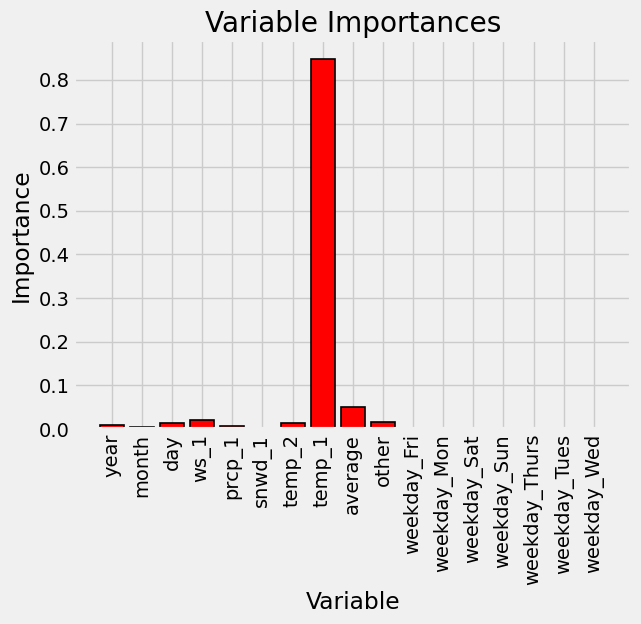

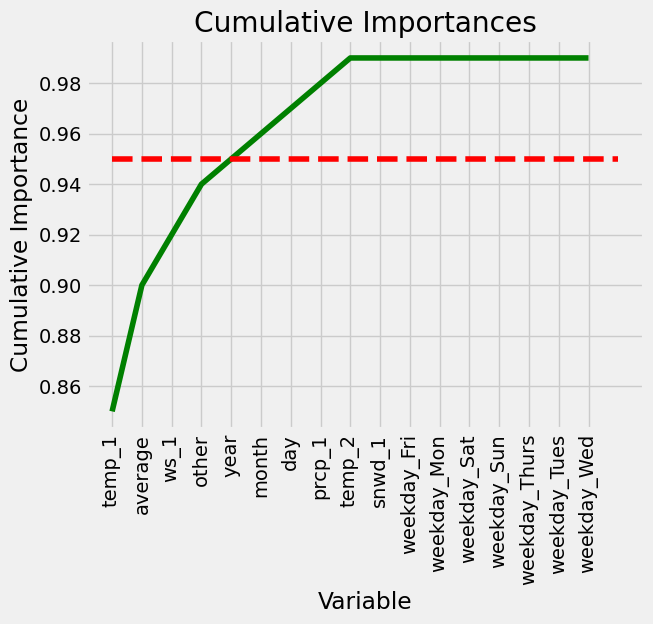

Number of features for 95% importance: 5
Important train features shape: (1643, 5)
Important test features shape: (548, 5)
平均温度误差: 4.11 degrees.
Accuracy: 93.28 %.
使用所有特征时建模与测试的平均时间消耗: 0.82 秒.
使用所有特征时建模与测试的平均时间消耗: 0.51 秒.
相对accuracy下降: 0.071 %.
相对时间效率提升: 38.61 %.


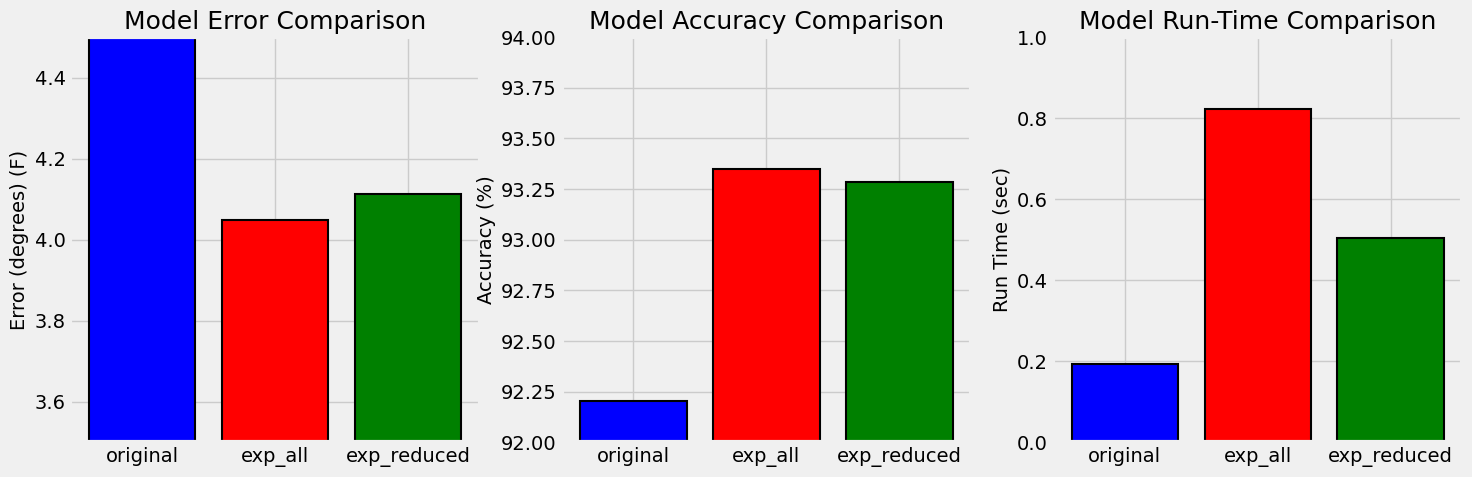

In [23]:
# 导入工具包
import pandas as pd

# 读取数据
features = pd.read_csv('data/temps_extended.csv')

# 独热编码
features = pd.get_dummies(features)

# 提取特征和标签
labels = features['actual']
features = features.drop('actual', axis = 1)

# 特征名字留着备用
feature_list = list(features.columns)

# 转换成所需格式
import numpy as np

features = np.array(features)
labels = np.array(labels)

# 数据集切分
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 0)
#%%
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# 工具包导入
import pandas as pd

# 为了剔除特征个数对结果的影响，这里特征统一只有老数据集中特征
original_feature_indices = [feature_list.index(feature) for feature in
                                      feature_list if feature not in
                                      ['ws_1', 'prcp_1', 'snwd_1']]

# 读取老数据集
original_features = pd.read_csv('data/temps.csv')

original_features = pd.get_dummies(original_features)

import numpy as np

# 数据和标签转换
original_labels = np.array(original_features['actual'])

original_features= original_features.drop('actual', axis = 1)

original_feature_list = list(original_features.columns)

original_features = np.array(original_features)

# 数据集切分
from sklearn.model_selection import train_test_split

original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, 
                                                                                                                test_size = 0.25, random_state = 42)

# 同样的树模型进行建模
from sklearn.ensemble import RandomForestRegressor

# 同样的参数与随机种子
rf = RandomForestRegressor(n_estimators= 100, random_state=0)

# 这里的训练集使用的是老数据集的
rf.fit(original_train_features, original_train_labels);

# 为了测试效果能够公平，统一使用一致的测试集，这里选择了刚刚我切分过的新数据集的测试集
predictions = rf.predict(test_features[:,original_feature_indices])

# 先计算温度平均误差
errors = abs(predictions - test_labels)

print('平均温度误差:', round(np.mean(errors), 2), 'degrees.')

# MAPE
mape = 100 * (errors / test_labels)

# 这里的Accuracy为了方便观察，我们就用100减去误差了，希望这个值能够越大越好
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn.ensemble import RandomForestRegressor

# 剔除掉新的特征，保证数据特征是一致的
original_train_features = train_features[:,original_feature_indices]

original_test_features = test_features[:, original_feature_indices]

rf = RandomForestRegressor(n_estimators= 100 ,random_state=0)

rf.fit(original_train_features, train_labels);

# 预测
baseline_predictions = rf.predict(original_test_features)

# 结果
baseline_errors = abs(baseline_predictions - test_labels)

print('平均温度误差:', round(np.mean(baseline_errors), 2), 'degrees.')

# (MAPE)
baseline_mape = 100 * np.mean((baseline_errors / test_labels))

# accuracy
baseline_accuracy = 100 - baseline_mape
print('Accuracy:', round(baseline_accuracy, 2), '%.')

# 准备加入新的特征
from sklearn.ensemble import RandomForestRegressor

rf_exp = RandomForestRegressor(n_estimators= 100, random_state=0)
rf_exp.fit(train_features, train_labels)

# 同样的测试集
predictions = rf_exp.predict(test_features)

# 评估
errors = abs(predictions - test_labels)

print('平均温度误差:', round(np.mean(errors), 2), 'degrees.')

# (MAPE)
mape = np.mean(100 * (errors / test_labels))

# 看一下提升了多少
improvement_baseline = 100 * abs(mape - baseline_mape) / baseline_mape
print('特征增多后模型效果提升:', round(improvement_baseline, 2), '%.')

# accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

# 特征名字
importances = list(rf_exp.feature_importances_)

# 名字，数值组合在一起
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# 排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# 打印出来 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

#准备画图
import matplotlib.pyplot as plt

# 指定风格
plt.style.use('fivethirtyeight')

# 指定位置
x_values = list(range(len(importances)))

# 绘图
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# x轴名字得竖着写
plt.xticks(x_values, feature_list, rotation='vertical')

# 图名
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

# 对特征进行排序
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# 累计重要性
cumulative_importances = np.cumsum(sorted_importances)

#准备画图
import matplotlib.pyplot as plt

# 绘制折线图
plt.plot(x_values, cumulative_importances, 'g-')

# 画一条红色虚线，0.95那
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# X轴
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Y轴和名字
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
plt.show()

# 看看有几个特征
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

# 选择这些特征
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
# 找到它们的名字
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# 重新创建训练集
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# 数据维度
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

# 再训练模型
rf_exp.fit(important_train_features, train_labels);

# 同样的测试集
predictions = rf_exp.predict(important_test_features)

# 评估结果
errors = abs(predictions - test_labels)

print('平均温度误差:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / test_labels)

# accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# 要计算时间了
import time

# 这次是用所有特征
all_features_time = []

# 算一次可能不太准，来10次取个平均
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(train_features, train_labels)
    all_features_predictions = rf_exp.predict(test_features)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('使用所有特征时建模与测试的平均时间消耗:', round(all_features_time, 2), '秒.')

# 这次是用部分重要的特征
reduced_features_time = []

# 算一次可能不太准，来10次取个平均
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(important_train_features, train_labels)
    reduced_features_predictions = rf_exp.predict(important_test_features)
    end_time = time.time()
    reduced_features_time.append(end_time - start_time)

reduced_features_time = np.mean(reduced_features_time)
print('使用所有特征时建模与测试的平均时间消耗:', round(reduced_features_time, 2), '秒.')

#%%
# 用分别的预测值来计算评估结果
all_accuracy =  100 * (1- np.mean(abs(all_features_predictions - test_labels) / test_labels))
reduced_accuracy = 100 * (1- np.mean(abs(reduced_features_predictions - test_labels) / test_labels))

#创建一个df来保存结果
comparison = pd.DataFrame({'features': ['all (17)', 'reduced (5)'], 
                           'run_time': [round(all_features_time, 2), round(reduced_features_time, 2)],
                           'accuracy': [round(all_accuracy, 2), round(reduced_accuracy, 2)]})

comparison[['features', 'accuracy', 'run_time']]

relative_accuracy_decrease = 100 * (all_accuracy - reduced_accuracy) / all_accuracy
print('相对accuracy下降:', round(relative_accuracy_decrease, 3), '%.')

relative_runtime_decrease = 100 * (all_features_time - reduced_features_time) / all_features_time
print('相对时间效率提升:', round(relative_runtime_decrease, 3), '%.')

# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
original_features = pd.read_csv('data/temps.csv')
original_features = pd.get_dummies(original_features)

# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
original_labels = np.array(original_features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
original_features= original_features.drop('actual', axis = 1)

# Saving feature names for later use
original_feature_list = list(original_features.columns)

# Convert to numpy array
original_features = np.array(original_features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size = 0.25, random_state = 42)
#%%
# Find the original feature indices 
original_feature_indices = [feature_list.index(feature) for feature in
                                      feature_list if feature not in
                                      ['ws_1', 'prcp_1', 'snwd_1']]

# Create a test set of the original features
original_test_features = test_features[:, original_feature_indices]

# Time to train on original data set (1 year)
original_features_time = []

# Do 10 iterations and take average for all features
for _ in range(10):
    start_time = time.time()
    rf.fit(original_train_features, original_train_labels)
    original_features_predictions = rf.predict(original_test_features)
    end_time = time.time()
    original_features_time.append(end_time - start_time)
    
original_features_time = np.mean(original_features_time)
#%%
# Calculate mean absolute error for each model
original_mae = np.mean(abs(original_features_predictions - test_labels))
exp_all_mae = np.mean(abs(all_features_predictions - test_labels))
exp_reduced_mae = np.mean(abs(reduced_features_predictions - test_labels))

# Calculate accuracy for model trained on 1 year of data
original_accuracy = 100 * (1 - np.mean(abs(original_features_predictions - test_labels) / test_labels))

# Create a dataframe for comparison
model_comparison = pd.DataFrame({'model': ['original', 'exp_all', 'exp_reduced'], 
                                 'error (degrees)':  [original_mae, exp_all_mae, exp_reduced_mae],
                                 'accuracy': [original_accuracy, all_accuracy, reduced_accuracy],
                                 'run_time (s)': [original_features_time, all_features_time, reduced_features_time]})

# Order the dataframe
model_comparison = model_comparison[['model', 'error (degrees)', 'accuracy', 'run_time (s)']]
#%%
model_comparison

# 绘图来总结把
# 设置总体布局，还是一整行看起来好一些
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (16,5), sharex = True)

# X轴
x_values = [0, 1, 2]
labels = list(model_comparison['model'])
plt.xticks(x_values, labels)

# 字体大小
fontdict = {'fontsize': 18}
fontdict_yaxis = {'fontsize': 14}

# 预测温度和真实温度差异对比
ax1.bar(x_values, model_comparison['error (degrees)'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax1.set_ylim(bottom = 3.5, top = 4.5)
ax1.set_ylabel('Error (degrees) (F)', fontdict = fontdict_yaxis); 
ax1.set_title('Model Error Comparison', fontdict= fontdict)

# Accuracy 对比
ax2.bar(x_values, model_comparison['accuracy'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax2.set_ylim(bottom = 92, top = 94)
ax2.set_ylabel('Accuracy (%)', fontdict = fontdict_yaxis); 
ax2.set_title('Model Accuracy Comparison', fontdict= fontdict)

# 时间效率对比
ax3.bar(x_values, model_comparison['run_time (s)'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax3.set_ylim(bottom = 0, top = 1)
ax3.set_ylabel('Run Time (sec)', fontdict = fontdict_yaxis); 
ax3.set_title('Model Run-Time Comparison', fontdict= fontdict);